<a href="https://colab.research.google.com/github/AIME1995/AIME1995/blob/main/CLASSIFICATIONDESCLIENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# La modèlisation par classification: l'agorithme Utilisez est l'algorithme K-Nearest Neighbours. Les K les plus proches voisins pour classer les données.


Dans cet atelier, vous chargerez un ensemble de données client, ajusterez les données et utiliserez les K-Nearest Neighbours pour prédire un point de données. Mais qu’est-ce que K-Nearest Neighbours ?

K-Nearest Neighbours est un algorithme d'apprentissage supervisé. Où les données sont « formées » avec des points de données correspondant à leur classification. Pour prédire la classe d'un point de données donné, il prend en compte les classes des « K » points de données les plus proches et choisit la classe à laquelle appartiennent la majorité des « K » points de données les plus proches comme classe prédite.

Voici une visualisation de l'algorithme K-Nearest Neighbours.
Image
Dans ce cas, nous avons des points de données de classe A et B. Nous voulons prédire ce qu'est l'étoile (point de données de test). Si nous considérons une valeur k de 3 (3 points de données les plus proches), nous obtiendrons une prédiction de classe B. Pourtant, si nous considérons une valeur k de 6, nous obtiendrons une prédiction de classe A.

En ce sens, il est important de considérer la valeur de k. Espérons qu'à partir de ce diagramme, vous devriez avoir une idée de ce qu'est l'algorithme K-Nearest Neighbours. Il prend en compte les « K » voisins les plus proches (points de données) lorsqu'il prédit la classification du point de test.

Utilisez K les plus proches voisins pour classer les données
Dans cet atelier, vous chargerez un ensemble de données client, ajusterez les données et utiliserez les K-Nearest Neighbours pour prédire un point de données. Mais qu’est-ce que K-Nearest Neighbours ?

K-Nearest Neighbours est un algorithme d'apprentissage supervisé. Où les données sont « formées » avec des points de données correspondant à leur classification. Pour prédire la classe d'un point de données donné, il prend en compte les classes des « K » points de données les plus proches et choisit la classe à laquelle appartiennent la majorité des « K » points de données les plus proches comme classe prédite.

Voici une visualisation de l'algorithme K-Nearest Neighbours.
Image
Dans ce cas, nous avons des points de données de classe A et B. Nous voulons prédire ce qu'est l'étoile (point de données de test). Si nous considérons une valeur k de 3 (3 points de données les plus proches), nous obtiendrons une prédiction de classe B. Pourtant, si nous considérons une valeur k de 6, nous obtiendrons une prédiction de classe A.

En ce sens, il est important de considérer la valeur de k. Espérons qu'à partir de ce diagramme, vous devriez avoir une idée de ce qu'est l'algorithme K-Nearest Neighbours. Il prend en compte les « K » voisins les plus proches (points de données) lorsqu'il prédit la classification du point de test.

# Importer les librairies nécessaires pour le projet

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline


# À propos de l'ensemble de données
## Le sceénario
Imaginez qu'un fournisseur de télécommunications ait segmenté sa clientèle en fonction des modèles d'utilisation des services, en catégorisant les clients en quatre groupes. Si les données démographiques peuvent être utilisées pour prédire l’adhésion à un groupe, l’entreprise peut personnaliser les offres pour les clients potentiels individuels. C'est un problème de classification. Autrement dit, étant donné l'ensemble de données, avec des étiquettes prédéfinies, nous devons construire un modèle à utiliser pour prédire la classe d'un cas nouveau ou inconnu.

L'exemple se concentre sur l'utilisation de données démographiques, telles que la région, l'âge et la situation matrimoniale, pour prédire les modèles d'utilisation.

Le champ cible, appelé **custcat**, a quatre valeurs possibles qui correspondent aux quatre groupes de clients, comme suit :

* 1- Service de base
* 2- E-Service
* 3- Service Plus
* 4- Service total

Notre objectif est de construire un classificateur, pour prédire la classe de cas inconnus. Nous utiliserons un type spécifique de classification appelé K-Nearest Neighbours ou K plus proche voisin en français.

# Téléchargeons l'ensemble de données.
 Pour télécharger les données, nous utiliserons !wget pour les télécharger depuis IBM Object Storage.

In [2]:
path="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv"
data = pd.read_csv(path)
data.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
# liste des variables
data.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

## Description des variables
* **Region (Région)** : La zone géographique ou la région où se trouve le client. Cette variable peut aider à segmenter les clients en fonction de leur emplacement.

* **Tenure (Ancienneté)** : La durée pendant laquelle le client est abonné aux services de l'entreprise de télécommunication. Elle mesure la fidélité ou la durée de la relation client.

* **Age (Âge)**: L'âge du client. Il peut être utilisé pour comprendre la démographie des clients et personnaliser les offres en conséquence.

* **Marital (État civil) **: L'état civil du client, qui peut être marié, célibataire, divorcé, veuf, etc. Ceci peut être utile pour des offres spécifiques.

* **Address (Adresse)** : L'adresse du client, qui peut être utile pour la facturation et la livraison des services.

* **Income (Revenu)** : Le revenu du client, qui peut être utilisé pour segmenter les clients en fonction de leur pouvoir d'achat.

* **Ed (Niveau d'éducation)** : Le niveau d'éducation du client, tel que le diplôme obtenu. Cette variable peut être utilisée pour comprendre le niveau d'éducation des clients.

* **Employ (Emploi)** : Le statut professionnel ou le type d'emploi du client. Il peut s'agir d'informations telles que "employé", "étudiant", "retraité", etc.

* **Retire (Retraité)** : Indique si le client est à la retraite ou non. Cela peut être utile pour les offres spécifiques aux retraités.

* **Gender (Genre)** : Le genre du client, c'est-à-dire s'il s'agit d'un homme ou d'une femme.

* **Reside (Résidence)** : Le type de résidence du client, comme "appartement" ou "maison". Cela peut être utile pour personnaliser les offres.

* **Custcat (Catégorie de client)** : La catégorie à laquelle le client appartient. Cette variable peut être utilisée pour segmenter les clients en fonction de leur comportement ou de leurs besoins.

In [4]:
data.shape

(1000, 12)

On a une de données cliente de 1000 clients ou observations et de 12 variables.

In [5]:
# les types de variables dans la base des données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [6]:
data.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


# Visualisons les données
La visualisons nous permet d'explorer nos données.

## Analse univarié

Observons combien de données il y a dans chque classe.

In [7]:
data['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

On a approximativement la meme part de données pour chaque classe. Ce qui nous évite les problèmes de sous échantillonage ou de sur échantillonage.
Caractéristiques des classes :
* La classe 1: service basic
* La classe 2: service en ligne
* La classe 3: Plus de service
* La classe 4: Total service


## visualisation de chaque variable

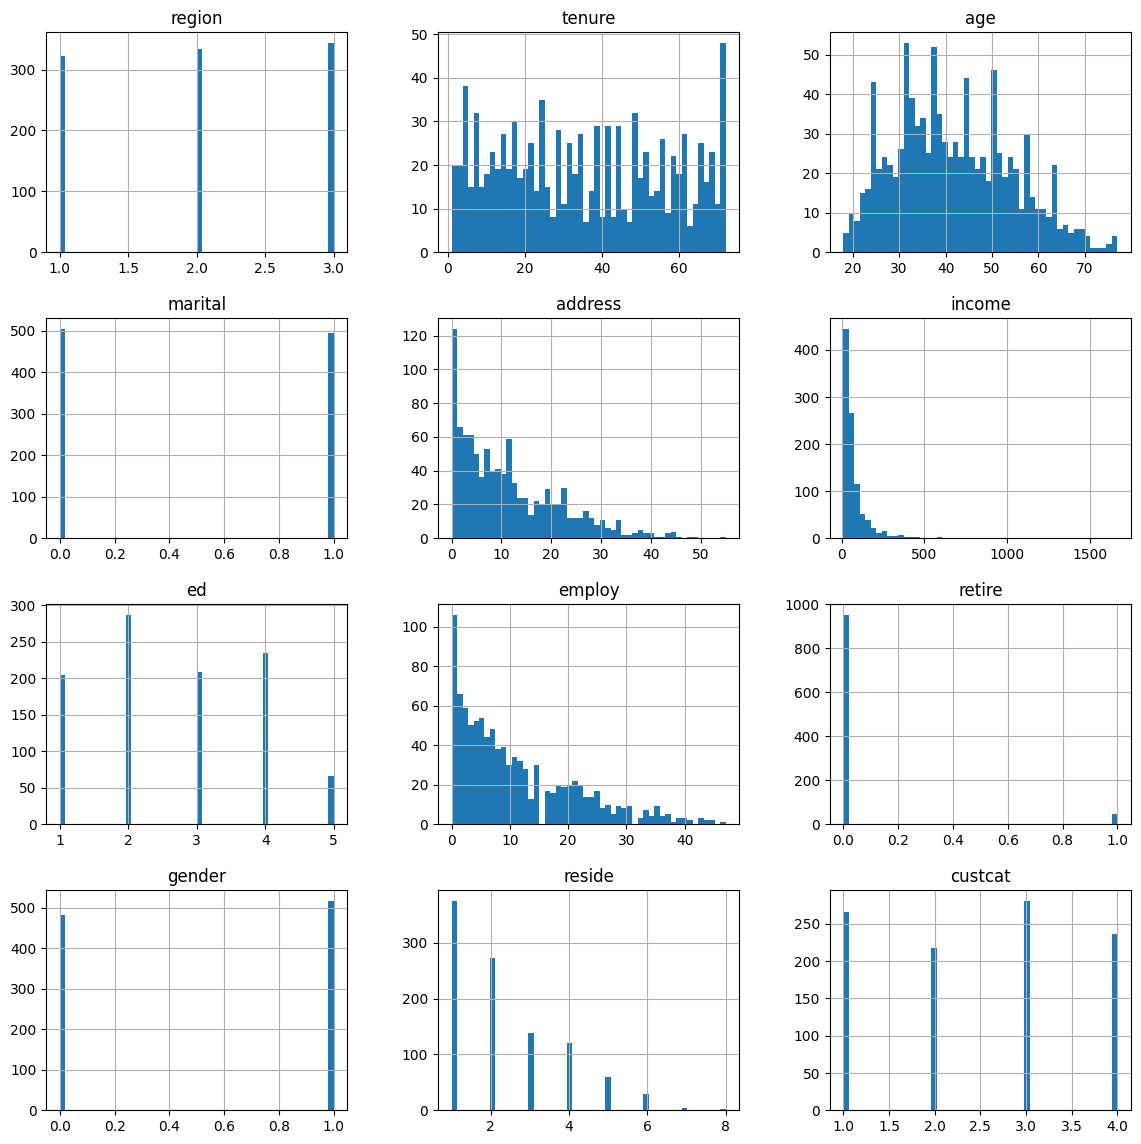

In [8]:
data.hist(bins =50, sharex=False, sharey=False, figsize=(14, 14))
plt.show()

array([[<Axes: title={'center': 'income'}>]], dtype=object)

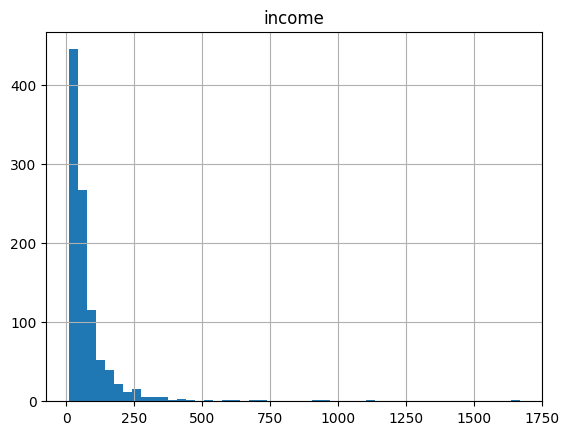

In [9]:
# Variable income
data.hist(column= 'income', bins=50)

La distribution de la variable income n'est pas assymétrique. DLa distribution des variables n'est pas homogène autour de la moyenne.

array([[<Axes: title={'center': 'age'}>]], dtype=object)

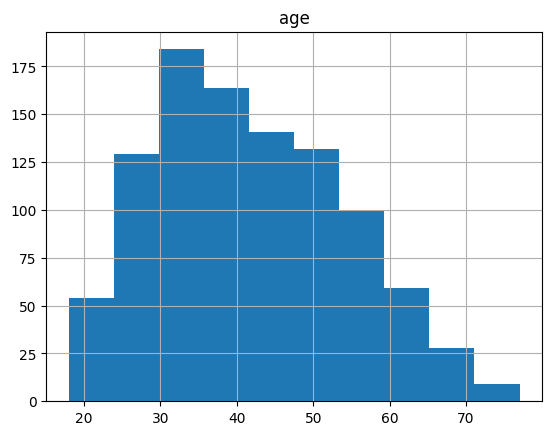

In [10]:
# La variable age
data.hist(column = 'age')

array([[<Axes: title={'center': 'tenure'}>]], dtype=object)

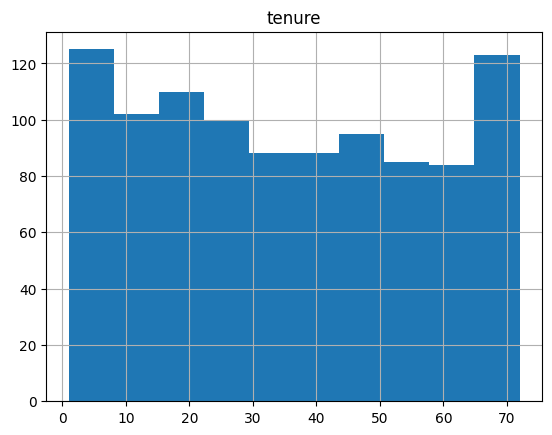

In [11]:
# La variable tenure ou l'ancienété des clients
data.hist(column='tenure')

3    344
2    334
1    322
Name: region, dtype: int64

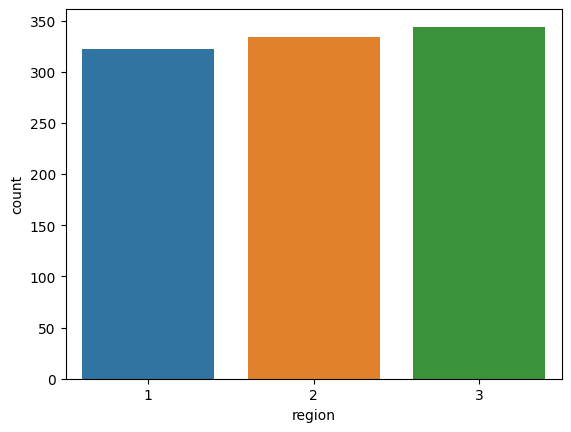

In [12]:
# La variable region
sns.countplot(x='region', data=data)
data['region'].value_counts()

Les clients sont de trois régions différentes : 1, 2 et 3. On a 344 clients dans la région 3, 334 dans la régiob 2, et 322 dans la région 1.

2    287
4    234
3    209
1    204
5     66
Name: ed, dtype: int64

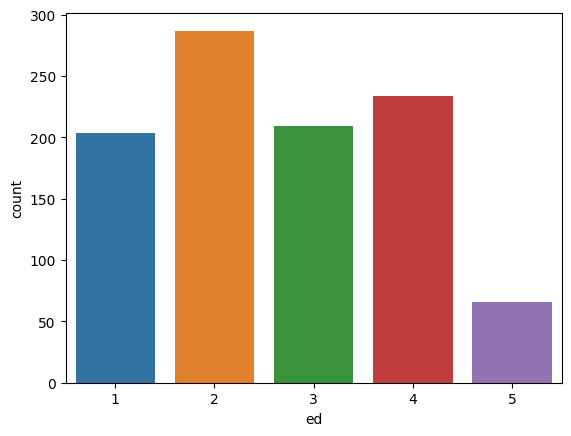

In [13]:
# varible marital
sns.countplot(x='ed', data = data)
data['ed'].value_counts()

Le niveau d'éducation des clients est réparti en 5 catégories allant du niveau inférieurS au niveau suoérieurs.


0.0    953
1.0     47
Name: retire, dtype: int64

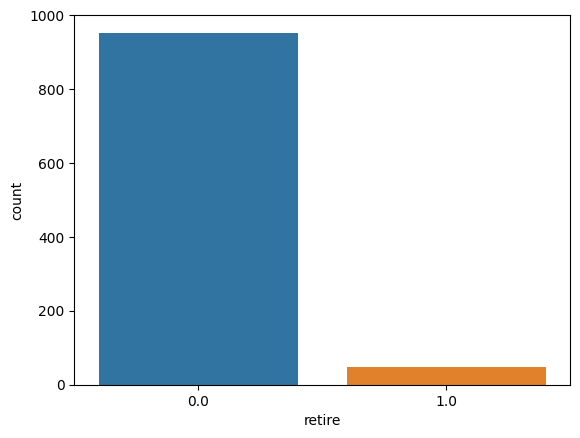

In [14]:
# La varible retire
sns.countplot(x='retire', data=data)
data['retire'].value_counts()

0    505
1    495
Name: marital, dtype: int64

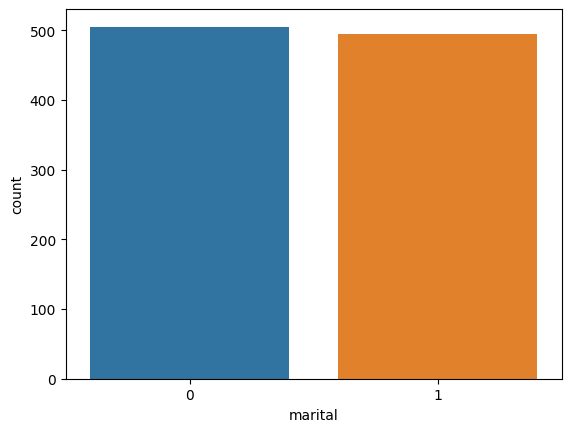

In [15]:
# La varible marital
sns.countplot(x='marital', data=data)
data['marital'].value_counts()

505 clients ont célibataires et 495 sont des mariés

0     106
1      66
2      59
5      54
4      52
3      50
7      48
6      44
9      39
8      38
11     34
12     32
10     30
15     30
13     28
21     22
20     20
22     20
18     20
19     19
25     17
16     17
17     16
24     14
23     14
14     13
27     10
35      9
31      9
29      9
30      8
26      8
33      7
28      5
37      5
34      4
36      4
32      3
39      3
43      3
40      3
44      2
41      2
45      2
38      1
47      1
Name: employ, dtype: int64

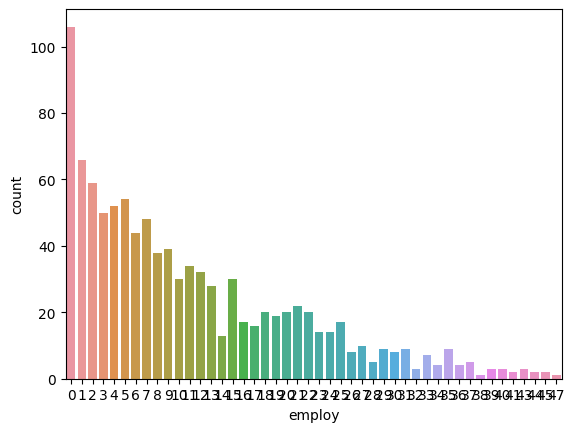

In [16]:
# la variable employ
sns.countplot(x='employ', data=data)
data['employ'].value_counts()

1    517
0    483
Name: gender, dtype: int64

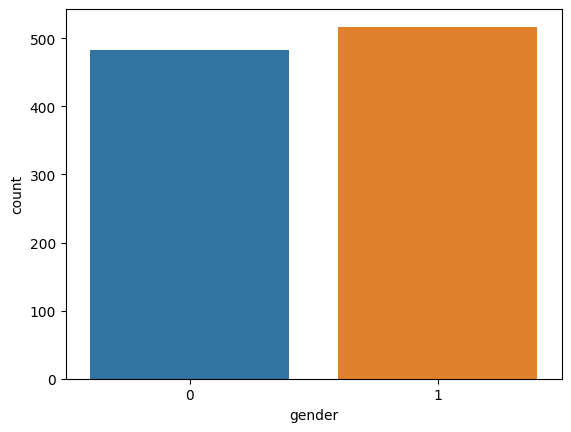

In [17]:
# La variable gender
sns.countplot(x='gender', data = data)
data['gender'].value_counts()

## Quelques analyses bivariées

<Axes: xlabel='marital', ylabel='custcat'>

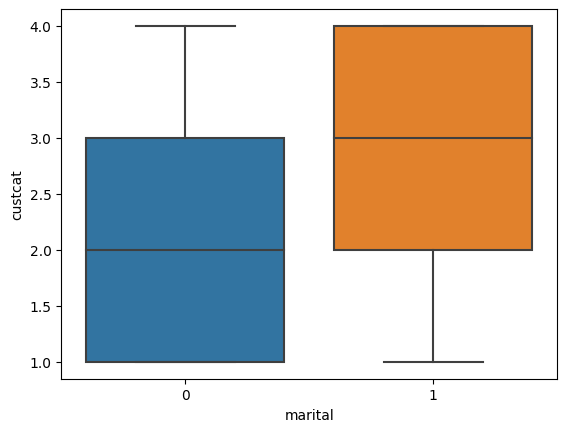

In [18]:
sns.boxplot( y ='custcat', x='marital', data=data)

ed  custcat
2   3          98
4   4          95
1   3          91
2   1          83
1   1          75
4   2          59
3   3          54
2   2          54
3   1          53
    2          53
2   4          52
3   4          49
4   1          46
    3          34
5   4          31
1   2          29
5   2          22
1   4           9
5   1           9
    3           4
dtype: int64

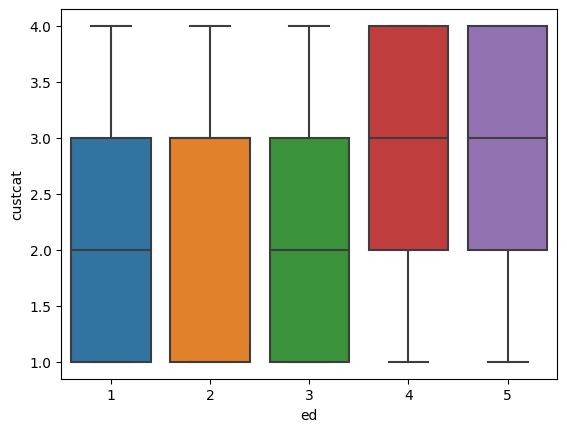

In [19]:
sns.boxplot(x='ed', y ='custcat', data=data)
data[['ed', 'custcat']].value_counts()

gender  custcat
1       3          142
0       3          139
1       1          135
0       1          131
1       4          121
        2          119
0       4          115
        2           98
dtype: int64

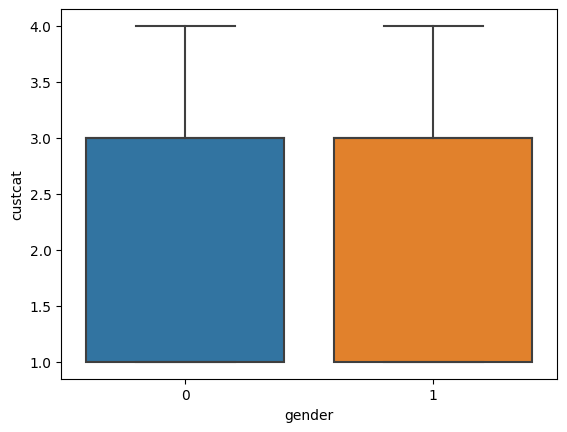

In [20]:
sns.boxplot(y ='custcat', x='gender', data=data)
data[['gender', 'custcat']].value_counts()

Pour utiliser la bibliothèque scikit-learn, nous devons convertir la trame de données Pandas en un tableau Numpy :

In [21]:
x=data[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values
x[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [22]:
y = data['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

# Préparons les données pour la modèlisation
## Divisons les données en donnée de test et d'entrainement

La précision de l'échantillon est le pourcentage de prédictions correctes que le modèle fait sur des données sur lesquelles le modèle n'a PAS été formé. Effectuer un entraînement et un test sur le même ensemble de données aura très probablement une faible précision hors échantillon, en raison de la probabilité de surajustement de notre modèle.

Il est important que nos modèles aient une grande précision hors échantillon, car le but de tout modèle est bien entendu de faire des prédictions correctes sur des données inconnues. Alors, comment pouvons-nous améliorer la précision hors échantillon ? Une solution consiste à utiliser une approche d’évaluation appelée Train/Test Split. Train/Test Split implique de diviser l'ensemble de données en ensembles de formation et de test respectivement, qui s'excluent mutuellement. Après quoi, vous vous entraînez avec l’ensemble d’entraînement et testez avec l’ensemble de test.

Cela fournira une évaluation plus précise de la précision hors échantillon, car l'ensemble de données de test ne fait pas partie de l'ensemble de données qui a été utilisé pour entraîner le modèle. C’est plus réaliste pour les problèmes du monde réel.

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
print("les données d'entrainements:", x_train.shape, y_train.shape)
print("Les données de test:", x_test.shape, y_test.shape)

les données d'entrainements: (800, 11) (800,)
Les données de test: (200, 11) (200,)


## Normalisons les données
La normalisation des données donne aux données une moyenne nulle et une variance unitaire, c'est une bonne pratique, en particulier pour les algorithmes tels que KNN qui sont basés sur la distance des points de données :

In [24]:
x_train_norm = preprocessing.StandardScaler().fit(x_train).transform(x_train.astype(float))
x_train_norm[0:5]


array([[-1.28618818e+00, -1.53085556e+00, -8.49354628e-01,
         1.00752834e+00, -7.46393214e-01, -4.83608776e-01,
         1.12305195e+00, -7.02283455e-01, -2.23313158e-01,
        -1.01005050e+00,  1.83304333e+00],
       [-4.79805457e-02,  2.51253999e-01,  3.44957012e-01,
         1.00752834e+00,  2.45326718e-01, -2.71543263e-01,
        -5.40728715e-01, -1.25385370e-04, -2.23313158e-01,
        -1.01005050e+00,  1.83304333e+00],
       [-1.28618818e+00, -7.80493639e-01, -6.90113076e-01,
         1.00752834e+00, -5.21892614e-02, -4.92444839e-01,
        -1.37261905e+00, -8.02591750e-01, -2.23313158e-01,
        -1.01005050e+00,  1.83304333e+00],
       [-4.79805457e-02, -1.53085556e+00, -3.71629972e-01,
        -9.92527915e-01,  1.46154725e-01, -4.74772713e-01,
        -1.37261905e+00, -8.02591750e-01, -2.23313158e-01,
         9.90049504e-01, -9.33814526e-01],
       [ 1.19022709e+00, -2.17722200e-01, -6.10492300e-01,
        -9.92527915e-01, -2.50533248e-01,  2.40948394e-01,
  

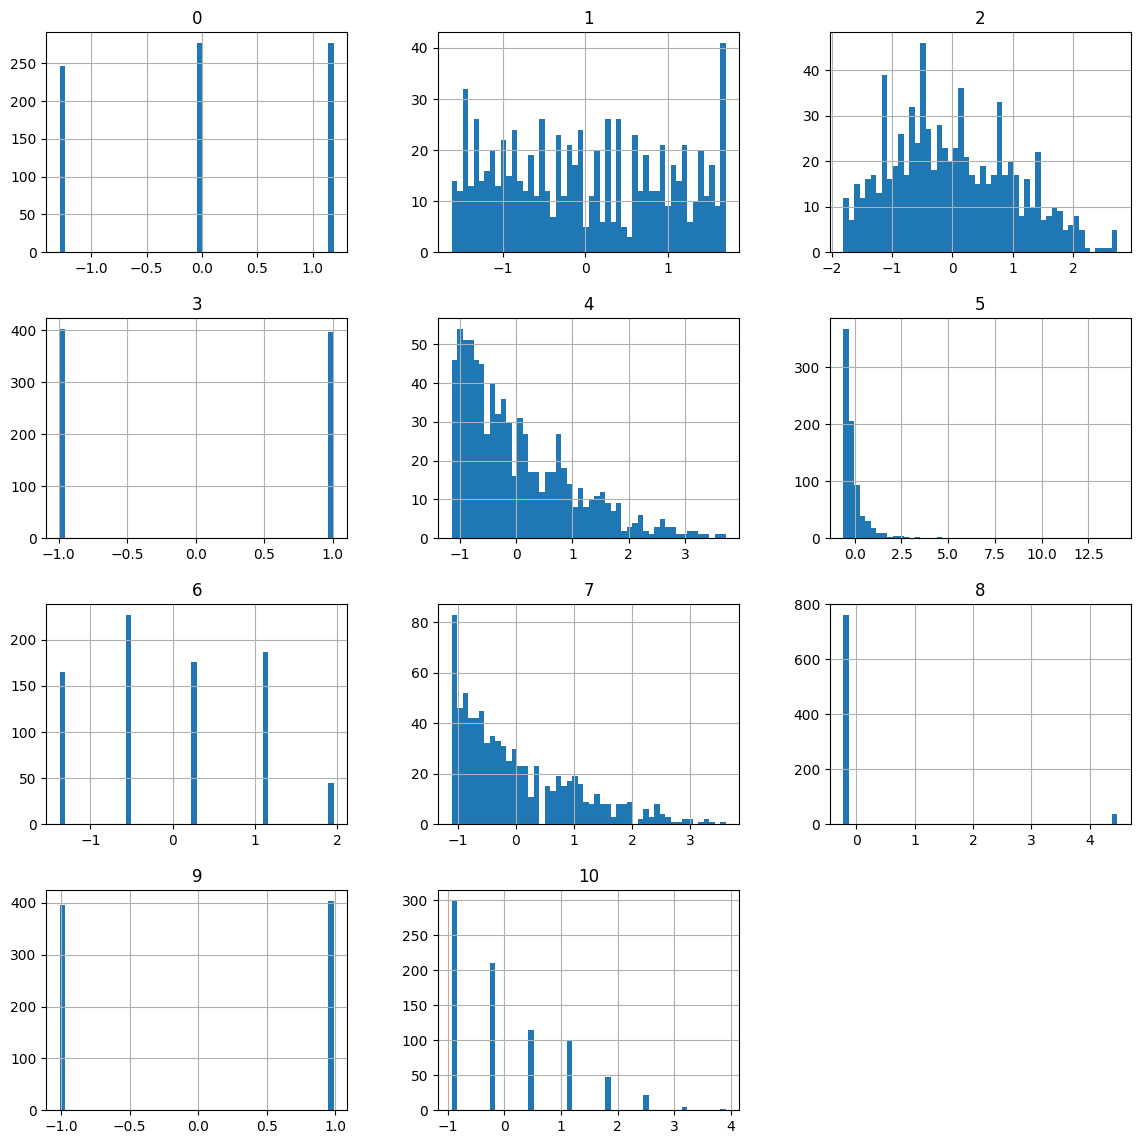

In [25]:
from pandas.core.frame import DataFrame
# Regardons la diistribution de nos varibales
x_train_norm_hist=DataFrame(x_train_norm)
x_train_norm_hist.hist(bins =50, sharex=False, sharey=False, figsize=(14, 14))
plt.show()

Importons la librairie neigbor

In [26]:
from sklearn.neighbors import KNeighborsClassifier

## Entrainement
Commençons avec K =4

In [27]:
k = 4
# Le modèle d'entrainement et de prédiction
neigh = KNeighborsClassifier(n_neighbors=k).fit(x_train_norm, y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [29]:
x_test_norm = preprocessing.StandardScaler().fit(x_test).transform(x_test.astype(float))
x_test_norm

array([[-1.13100942, -0.93533648, -0.93817795, ..., -0.21707238,
        -1.13967126,  1.97590703],
       [-1.13100942, -1.44823286, -0.13972863, ..., -0.21707238,
        -1.13967126, -0.90337462],
       [-1.13100942, -0.51569399,  1.53701494, ..., -0.21707238,
         0.87744601,  1.25608662],
       ...,
       [ 0.05329364, -0.51569399, -0.13972863, ..., -0.21707238,
         0.87744601, -0.18355421],
       [ 1.23759669,  1.6291454 , -0.45910836, ..., -0.21707238,
         0.87744601, -0.90337462],
       [ 1.23759669, -1.30835203, -0.53895329, ..., -0.21707238,
         0.87744601, -0.90337462]])

## Prédiction
Nous pouvons utiliser le modèle pour faire la prédiction sur les varibles de test

In [30]:
from sklearn import neighbors
yhat = neigh.predict(x_test_norm)
yhat[0:5]

array([3, 1, 3, 2, 4])

## Évaluation de la précision
Dans la classification multi-étiquettes, __accuracy classification score__ est une fonction qui calcule la précision du sous-ensemble. Cette fonction est égale à la fonction jaccard_score. Essentiellement, il calcule dans quelle mesure les étiquettes réelles et les étiquettes prédites correspondent dans l'ensemble de test.

In [40]:
from sklearn import metrics
print("La précision du donnée d'entrainement est :", metrics.accuracy_score(y_train, neigh.predict(x_train_norm)))
print("La précision des données de test est :", metrics.accuracy_score(y_test, yhat))

La précision du donnée d'entrainement est : 0.5475
La précision des données de test est : 0.33


###Construisons le meme modèle avec k = 6

In [35]:
k = 6
neigh_6 = KNeighborsClassifier(n_neighbors=k).fit(x_train_norm, y_train)
neigh_6

KNeighborsClassifier(n_neighbors=6)

In [36]:
y_yat_6 = neigh_6.predict(x_test_norm)
y_yat_6[0:5]

array([3, 3, 3, 2, 4])

Evaluons la précision du modèle

In [41]:
print("La pricision des données d'entrainement est :", metrics.accuracy_score(y_train, neigh_6.predict(x_train_norm)))
print("La précision des données de test ets :", metrics.accuracy_score(y_test, y_yat_6))

La pricision des données d'entrainement est : 0.5125
La précision des données de test ets : 0.335


#### Et les autres K ?
K dans KNN, est le nombre de voisins les plus proches à examiner. Il est censé être spécifié par l'utilisateur. Alors, comment pouvons-nous choisir la bonne valeur pour K ?
La solution générale est de réserver une partie de vos données pour tester l'exactitude du modèle. Choisissez ensuite k = 1, utilisez la partie formation pour la modélisation et calculez la précision de la prédiction en utilisant tous les échantillons de votre ensemble de test. Répétez ce processus en augmentant le k et voyez quel k est le meilleur pour votre modèle.

Nous pouvons calculer la précision de KNN pour différentes valeurs de k.

In [44]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train_norm,y_train)
    yhat=neigh.predict(x_test_norm)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.32 , 0.315, 0.335, 0.33 , 0.34 , 0.335, 0.35 , 0.34 , 0.335])

#### Plot the model accuracy for a different number of neighbors.


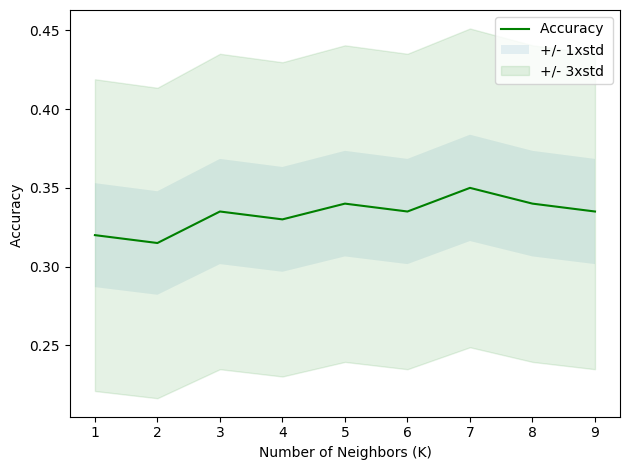

In [46]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [48]:
print( "La meilleur est ", mean_acc.max(), "avec k=", mean_acc.argmax()+1)

La meilleur est  0.35 avec k= 7
